In [48]:
import importlib
import sys
import os
sys.path.append(os.path.abspath("src"))
import neural_network
import normalizer
importlib.reload(neural_network)
importlib.reload(normalizer)
from neural_network import NeuralNetwork
from normalizer import Normalizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Momentum
```python

Theta = initialize_randomly()
Momentum = np.zeros_like(Theta)
learning_rate = eta
momentum_factor = lambda_value

while not stop_condition():
    Delta_Theta = np.zeros_like(Theta)
    
    for X, Y in training_set:
        Y_hat = Network(Theta, X)
        Delta_Theta -= gradient(Network, Theta, X, Y)
    
    Momentum = Delta_Theta + Momentum * momentum_factor
    Theta += learning_rate * Momentum

```

### RMSprop

adjusts the learning rate for each parameter based on the moving average of squared gradients

1. **Compute the moving average of squared gradients:**
   $$E[g^2]_t = \beta E[g^2]_{t-1} + (1 - \beta) g_t^2$$

2. **Update the parameter:**
   $$\theta_t = \theta_{t-1} - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t$$

where:
- $E[g^2]_t$ is the moving average of squared gradients,
- $g_t$ is the current gradient,
- $\beta$ (e.g., 0.9) is the smoothing coefficient,
- $\epsilon$ is a small constant to prevent division by zero.




In [2]:
def load_data(training_path, test_path, index_col=0):
    training=pd.read_csv(training_path, index_col=index_col)
    test=pd.read_csv(test_path, index_col=index_col)

    X_train, Y_train=training['x'].to_numpy().reshape(-1,1), training['y'].to_numpy().reshape(-1,1)
    X_test, Y_test=test['x'].to_numpy().reshape(-1,1), test['y'].to_numpy().reshape(-1,1)

    return X_train, Y_train, X_test, Y_test

In [3]:
def plot_fitted_vs_actual(X_train, Y_train, Y_pred, train_or_test):
    plt.figure(figsize=(6, 4))
    plt.scatter(X_train, Y_pred, color='r', label="Predicted values")
    plt.scatter(X_train, Y_train, color='b', label="True values")
    plt.xlabel(f'X_{train_or_test}')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

### Square large dataset
MSE<1

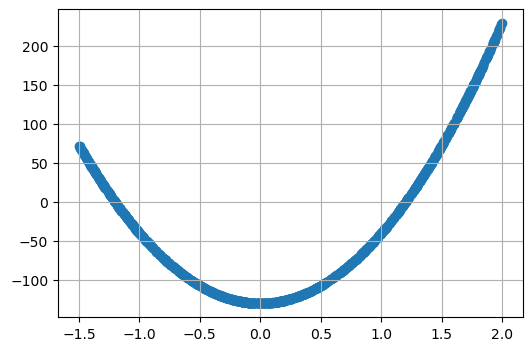

In [25]:
square_large_training_path='data/square-large-training.csv'
square_large_test_path='data/square-large-test.csv'

X_train_square_large, Y_train_square_large, X_test_square_large, Y_test_square_large=load_data(square_large_training_path, square_large_test_path)

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.scatter(X_train_square_large, Y_train_square_large)

In [26]:
normalizer_square_large = Normalizer()
X_train_square_large_normalized, Y_train_square_large_normalized = normalizer_square_large.fit_transform(X_train_square_large, Y_train_square_large)
X_test_square_large_normalized, Y_test_square_large_normalized = normalizer_square_large.transform(X_test_square_large, Y_test_square_large)

Epoch 0, Training Loss: 0.095368, Test Loss: 0.154571
Epoch 100, Training Loss: 0.000454, Test Loss: 0.003134
Epoch 200, Training Loss: 0.000170, Test Loss: 0.001368
Epoch 300, Training Loss: 0.000092, Test Loss: 0.000703
Epoch 400, Training Loss: 0.000034, Test Loss: 0.000318
Epoch 500, Training Loss: 0.000023, Test Loss: 0.000159
Epoch 600, Training Loss: 0.000007, Test Loss: 0.000088
Epoch 700, Training Loss: 0.000004, Test Loss: 0.000042
Epoch 800, Training Loss: 0.000004, Test Loss: 0.000028
Epoch 900, Training Loss: 0.000001, Test Loss: 0.000020
Epoch 1000, Training Loss: 0.000001, Test Loss: 0.000015
Epoch 1100, Training Loss: 0.000002, Test Loss: 0.000013
Epoch 1200, Training Loss: 0.000002, Test Loss: 0.000013
Epoch 1300, Training Loss: 0.000001, Test Loss: 0.000010
Epoch 1400, Training Loss: 0.000001, Test Loss: 0.000012
Epoch 1500, Training Loss: 0.000001, Test Loss: 0.000011
Epoch 1600, Training Loss: 0.000001, Test Loss: 0.000011
Epoch 1700, Training Loss: 0.000001, Test L

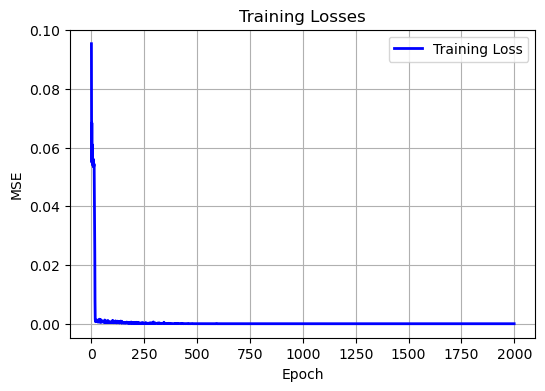

In [483]:
nn_square_large = NeuralNetwork(layers=[1, 20 ,1], learning_rate=0.2, activation='tanh',weights_initialize="Xavier" )

nn_square_large.train(X_train_square_large_normalized, Y_train_square_large_normalized, 
                       X_test_square_large_normalized, Y_test_square_large_normalized, 
                       epochs=2000, batch_size=32, verbose_interval=100, 
                       optimizer="momentum", momentum_coeff=0.9)

In [484]:
Y_pred_denorm=normalizer_square_large.denormalize_Y(nn_square_large.predict(X_test_square_large_normalized))
mse = np.mean((Y_pred_denorm - Y_test_square_large) ** 2)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 1.6607273964391172


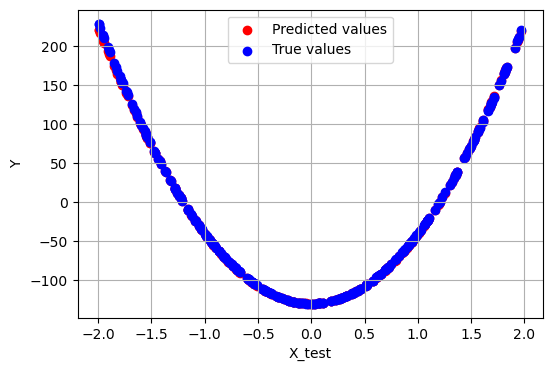

In [485]:
plot_fitted_vs_actual(X_test_square_large, Y_test_square_large, Y_pred_denorm, "test")

### Steps large dataset
MSE<3

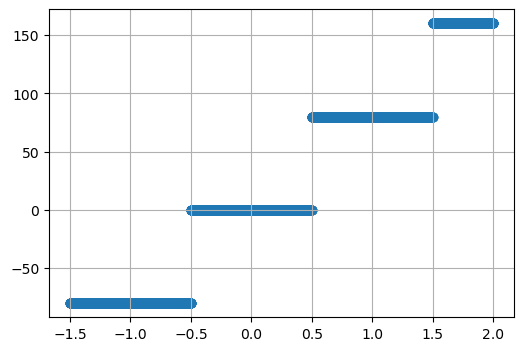

In [60]:
steps_large_training_path='data/steps-large-training.csv'
steps_large_test_path='data/steps-large-test.csv'

X_train_steps_large, Y_train_steps_large, X_test_steps_large, Y_test_steps_large=load_data(steps_large_training_path, steps_large_test_path)

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.scatter(X_train_steps_large, Y_train_steps_large)

Epoch 0, Training Loss: 7108.241478, Test Loss: 7180.779846
Epoch 100, Training Loss: 742.236905, Test Loss: 763.883477
Epoch 200, Training Loss: 212.364670, Test Loss: 217.630464
Epoch 300, Training Loss: 36.710491, Test Loss: 36.476646
Epoch 400, Training Loss: 19.270631, Test Loss: 26.657520
Epoch 500, Training Loss: 10.615562, Test Loss: 10.232178
Epoch 600, Training Loss: 7.876524, Test Loss: 6.467544
Epoch 700, Training Loss: 19.900324, Test Loss: 16.271693
Epoch 800, Training Loss: 5.740150, Test Loss: 4.029733
Epoch 900, Training Loss: 24.722452, Test Loss: 18.157143
Epoch 1000, Training Loss: 15.722215, Test Loss: 18.034438
Epoch 1100, Training Loss: 7.724102, Test Loss: 10.881526
Epoch 1200, Training Loss: 7.369167, Test Loss: 1.525622
Epoch 1300, Training Loss: 16.554188, Test Loss: 9.544588
Epoch 1400, Training Loss: 7.074937, Test Loss: 5.407558
Epoch 1500, Training Loss: 8.141784, Test Loss: 2.641413
Epoch 1600, Training Loss: 8.195128, Test Loss: 3.642450
Epoch 1700, Tra

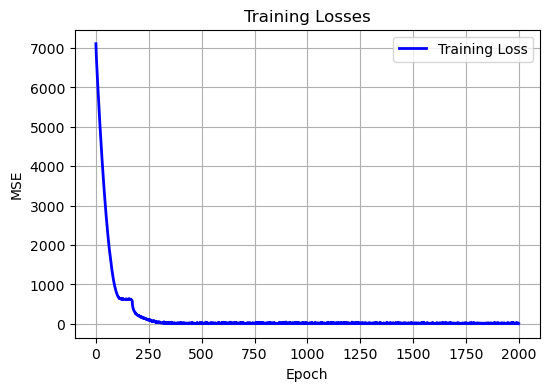

In [361]:
nn_steps_large = NeuralNetwork(layers=[1,5,5,5,5,1], learning_rate=0.001, activation='tanh', weights_initialize='Xavier')

nn_steps_large.train(X_train_steps_large, Y_train_steps_large, 
                     X_test_steps_large, Y_test_steps_large, 
                     batch_size=64, epochs=2000, verbose_interval=100,
                     optimizer="RMSprop", beta=0.9)

In [362]:
Y_pred=nn_steps_large.predict(X_test_steps_large)
mse = np.mean((Y_pred - Y_test_steps_large) ** 2)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 3.237246925371508


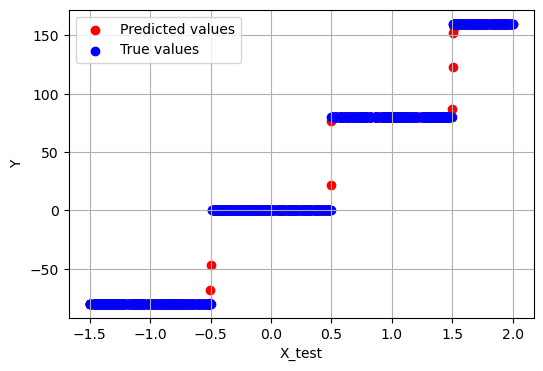

In [363]:
plot_fitted_vs_actual(X_test_steps_large, Y_test_steps_large, Y_pred, "test")

### Multimodal large dataset
MSE<9

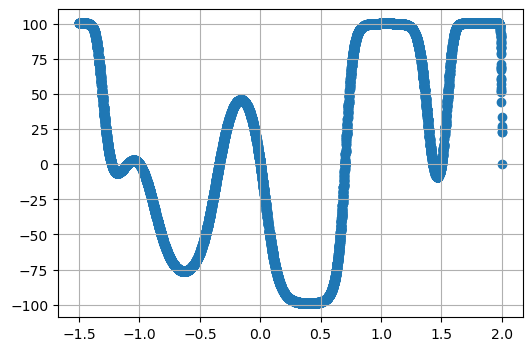

In [113]:
multimodal_large_training_path='data//multimodal-large-training.csv'
multimodal_large_test_path='data/multimodal-large-test.csv'

X_train_multimodal_large, Y_train_multimodal_large, X_test_multimodal_large, Y_test_multimodal_large=load_data(multimodal_large_training_path, multimodal_large_test_path, index_col=None)

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.scatter(X_train_multimodal_large, Y_train_multimodal_large)

In [114]:
normalizer_multimodal_large = Normalizer()
X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized = normalizer_multimodal_large.fit_transform(X_train_multimodal_large, Y_train_multimodal_large)
X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized = normalizer_multimodal_large.transform(X_test_multimodal_large, Y_test_multimodal_large)

Epoch 0, Training Loss: 0.046315, Test Loss: 0.045920
Epoch 100, Training Loss: 0.000659, Test Loss: 0.000590
Epoch 200, Training Loss: 0.000373, Test Loss: 0.000298
Epoch 300, Training Loss: 0.000396, Test Loss: 0.000318
Epoch 400, Training Loss: 0.000761, Test Loss: 0.000705
Epoch 500, Training Loss: 0.000508, Test Loss: 0.000385
Epoch 600, Training Loss: 0.000333, Test Loss: 0.000217
Epoch 700, Training Loss: 0.000379, Test Loss: 0.000356
Epoch 800, Training Loss: 0.000321, Test Loss: 0.000255
Epoch 900, Training Loss: 0.000224, Test Loss: 0.000155
Epoch 1000, Training Loss: 0.000409, Test Loss: 0.000274
Epoch 1100, Training Loss: 0.000692, Test Loss: 0.000677
Epoch 1200, Training Loss: 0.000599, Test Loss: 0.000501
Epoch 1300, Training Loss: 0.000264, Test Loss: 0.000151
Epoch 1400, Training Loss: 0.000333, Test Loss: 0.000251
Total training time: 903.24 seconds


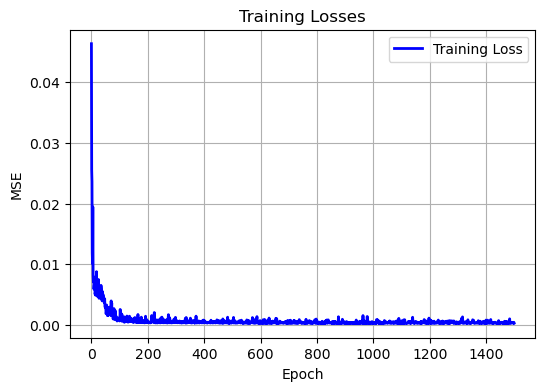

In [144]:
nn_multimodal_large = NeuralNetwork(layers=[1, 20,20, 1], learning_rate=0.1, activation='relu',weights_initialize='He')
nn_multimodal_large.train(X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
                          X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized, 
                          batch_size=32, epochs=1500, verbose_interval=100,
                          optimizer="momentum", momentum_coeff=0.9)

In [147]:
Y_pred_denorm=normalizer_multimodal_large.denormalize_Y(nn_multimodal_large.predict(X_test_multimodal_large_normalized))
mse_test = np.mean((Y_pred_denorm - Y_test_multimodal_large) ** 2)
print(f"MSE on the test set (on non-normalized data): {mse_test}")

MSE on the test set (on non-normalized data): 7.444110746335695


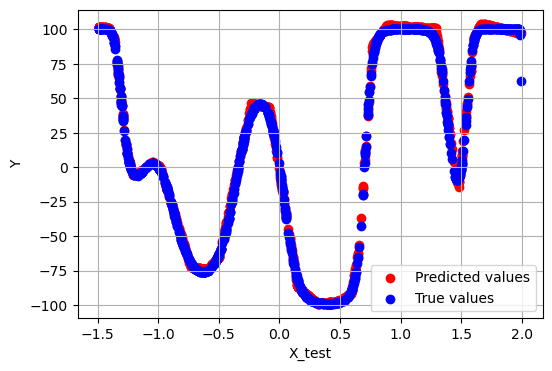

In [148]:
plot_fitted_vs_actual(X_test_multimodal_large, Y_test_multimodal_large, Y_pred_denorm, "test")

### SGD, Momentum, RMSprop comparison


In [220]:
def plot_training_losses_for_optimizers(nn_sgd, nn_momentum, nn_rmsprop):
    fig, ax = plt.subplots(1, 3, figsize=(10, 4))

    y_min = min(min(nn_sgd.train_losses), min(nn_momentum.train_losses), min(nn_rmsprop.train_losses))
    y_max = max(max(nn_sgd.train_losses), max(nn_momentum.train_losses), max(nn_rmsprop.train_losses))

    ax[0].plot(nn_sgd.train_losses, label="SGD", color="blue")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("MSE Loss")
    ax[0].set_title("SGD Training")
    ax[0].grid(True)
    ax[0].legend()
    ax[0].set_ylim(y_min, y_max)

    ax[1].plot(nn_momentum.train_losses, label="Momentum", color="green")
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("MSE Loss")
    ax[1].set_title("Momentum Training")
    ax[1].grid(True)
    ax[1].legend()
    ax[1].set_ylim(y_min, y_max)

    ax[2].plot(nn_rmsprop.train_losses, label="RMSprop", color="purple")
    ax[2].set_xlabel("Epochs")
    ax[2].set_ylabel("MSE Loss")
    ax[2].set_title("RMSprop Training")
    ax[2].grid(True)
    ax[2].legend()
    ax[2].set_ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

#### square large dataset

In [209]:
nn_sgd_square_large=NeuralNetwork(layers=[1,5,5,1], learning_rate=0.1, activation="tanh", weights_initialize="Xavier")
nn_sgd_square_large.train(X_train_square_large_normalized, Y_train_square_large_normalized, 
                          X_test_square_large_normalized, Y_test_square_large_normalized,
                          batch_size=32, epochs=100, verbose=False, plot_training_loss=False,
                          optimizer="SGD")    


nn_momentum_square_large=NeuralNetwork(layers=[1,5,5,1], learning_rate=0.1, activation="tanh", weights_initialize="Xavier")
nn_momentum_square_large.train(X_train_square_large_normalized, Y_train_square_large_normalized, 
                          X_test_square_large_normalized, Y_test_square_large_normalized,
                          batch_size=32, epochs=100, verbose=False, plot_training_loss=False,
                          optimizer="momentum", momentum_coeff=0.9)    

nn_RMSprop_square_large=NeuralNetwork(layers=[1,5,5,1], learning_rate=0.1, activation="tanh", weights_initialize="Xavier")
nn_RMSprop_square_large.train(X_train_square_large_normalized, Y_train_square_large_normalized, 
                          X_test_square_large_normalized, Y_test_square_large_normalized,
                          batch_size=32, epochs=100, verbose=False, plot_training_loss=False,
                          optimizer="RMSprop", beta=0.9)           

Total training time: 0.25 seconds
Total training time: 0.33 seconds
Total training time: 0.40 seconds


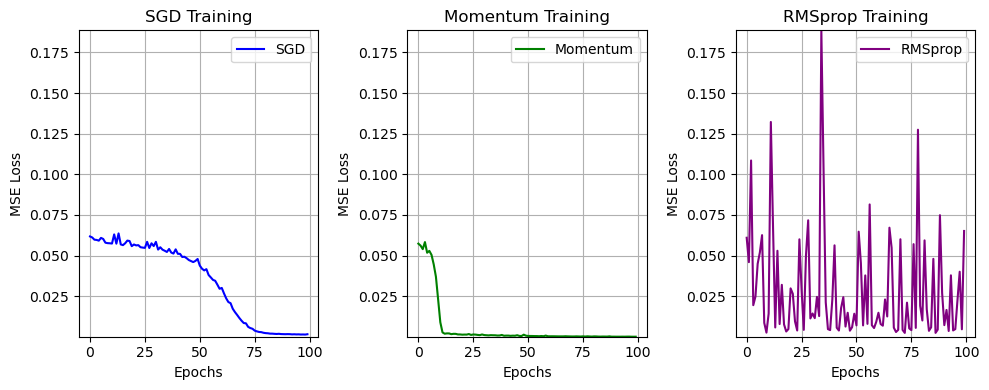

In [221]:
plot_training_losses_for_optimizers(nn_sgd_square_large, nn_momentum_square_large, nn_RMSprop_square_large)

#### multimodal large dataset

In [213]:
nn_sgd_steps_large=NeuralNetwork(layers=[1,5,5,1], learning_rate=0.1, activation="relu", weights_initialize="He")
nn_sgd_steps_large.train(X_train_steps_large, Y_train_steps_large, 
                          X_test_steps_large, Y_test_steps_large,
                          batch_size=32, epochs=100, verbose=False, plot_training_loss=False,
                          optimizer="SGD")  

nn_momentum_steps_large=NeuralNetwork(layers=[1,5,5,1], learning_rate=0.1, activation="relu", weights_initialize="He")
nn_momentum_steps_large.train(X_train_steps_large, Y_train_steps_large, 
                          X_test_steps_large, Y_test_steps_large,
                          batch_size=32, epochs=100, verbose=False, plot_training_loss=False,
                          optimizer="momentum", momentum_coeff=0.9)    

nn_RMSprop_steps_large=NeuralNetwork(layers=[1,5,5,1], learning_rate=0.1, activation="relu", weights_initialize="He")
nn_RMSprop_steps_large.train(X_train_steps_large, Y_train_steps_large,  
                          X_test_steps_large, Y_test_steps_large,
                          batch_size=32, epochs=100, verbose=False, plot_training_loss=False,
                          optimizer="RMSprop", beta=0.9)           

Total training time: 19.54 seconds
Total training time: 20.21 seconds
Total training time: 22.60 seconds


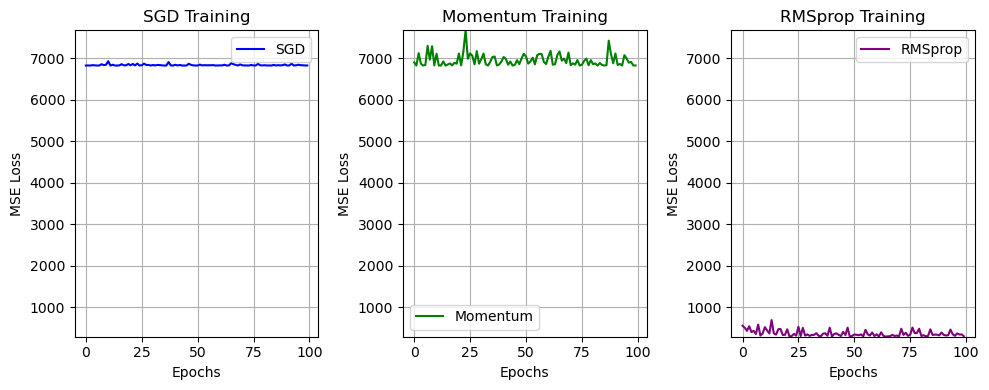

In [223]:
plot_training_losses_for_optimizers(nn_sgd_steps_large, nn_momentum_steps_large, nn_RMSprop_steps_large)

### Trying different momentum coefficients for Momentum and betas for RMSprop

In [424]:
X = np.linspace(-10, 10, 500).reshape(-1, 1)
Y = 0.5 * X**2 + 3 * X + 10 + np.random.normal(0, 10, size=X.shape) #quadratic with noise
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, Y_train, X_test, Y_test = X[:split_index], Y[:split_index], X[split_index:], Y[split_index:]

normalizer=Normalizer()
X_train_normalized, Y_train_normalized = normalizer.fit_transform(X_train, Y_train)
X_test_normalized, Y_test_normalized = normalizer.transform(X_test, Y_test)

Training with momentum coefficient = 0.5
Total training time: 0.12 seconds
MSE for momentum coeff = 0.5: 0.08131862630499506
Training with momentum coefficient = 0.7
Total training time: 0.10 seconds
MSE for momentum coeff = 0.7: 0.08272265178215213
Training with momentum coefficient = 0.9
Total training time: 0.11 seconds
MSE for momentum coeff = 0.9: 0.4189592881003489
Training with momentum coefficient = 0.99
Total training time: 0.11 seconds
MSE for momentum coeff = 0.99: 0.1969267962626623


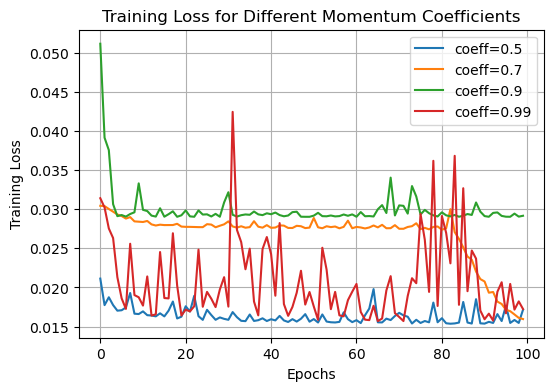

In [440]:
np.random.seed(42)

momentum_coeff = [0.5, 0.7, 0.9, 0.99]
results={}
for coeff in momentum_coeff:
    print(f"Training with momentum coefficient = {coeff}")
    nn=NeuralNetwork(layers=[1,5,5,1], learning_rate=0.1, activation="relu", weights_initialize="He")
    nn.train(X_train_normalized, Y_train_normalized, 
                       X_test_normalized, Y_test_normalized,
                       batch_size=32, epochs=100, verbose=False, plot_training_loss=False,
                       optimizer="momentum", momentum_coeff=coeff)
    results[coeff]=nn.train_losses
    print(f"MSE for momentum coeff = {coeff}: {nn.MSE(X_test_normalized, Y_test_normalized)}")

plt.figure(figsize=(6, 4))
for coeff, loss in results.items():
    plt.plot(loss, label=f"coeff={coeff}")

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss for Different Momentum Coefficients")
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Trying different beta values for RMSprop

Training with beta = 0.5
Total training time: 23.01 seconds
Training with beta = 0.7
Total training time: 19.45 seconds
Training with beta = 0.9
Total training time: 17.32 seconds
Training with beta = 0.99
Total training time: 17.51 seconds


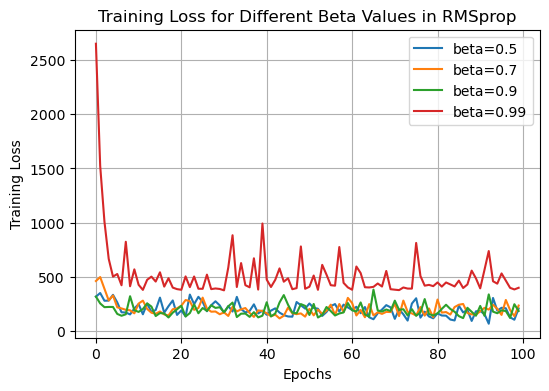

In [441]:
np.random.seed(42)

betas = [0.5, 0.7, 0.9, 0.99]
results={}
for beta in betas:
    print(f"Training with beta = {beta}")
    nn=NeuralNetwork(layers=[1,5,5,1], learning_rate=0.1, activation="relu", weights_initialize="He")
    nn.train(X_train_steps_large, Y_train_steps_large, 
                       X_test_steps_large, Y_test_steps_large,
                       batch_size=32, epochs=100, verbose=False, plot_training_loss=False,
                       optimizer="RMSprop", beta=beta)
    results[beta]=nn.train_losses

plt.figure(figsize=(6, 4))
for beta, loss in results.items():
    plt.plot(loss, label=f"beta={beta}")

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss for Different Beta Values in RMSprop")
plt.legend()
plt.grid()
plt.show()